In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Pakistan_Poverty_Dataset_2000_2023.csv to Pakistan_Poverty_Dataset_2000_2023.csv


In [ ]:
df = pd.read_csv('Pakistan_Poverty_Dataset_2000_2023.csv')

In [ ]:
# clean column names
df.columns = [col.strip().replace(" "," _ ").lower() for col in df.columns]

In [ ]:
print("Cleamed Column Names:")
print(df.columns)
# display first five rows
print("First 5 rows:")
print(df.head())

Cleamed Column Names:
Index(['year', 'population _ (millions)', 'gdp _ growth _ rate _ (%)',
       'inflation _ rate _ (%)', 'unemployment _ rate _ (%)',
       'poverty _ headcount _ ratio _ (%)',
       'agriculture _ growth _ rate _ (%)',
       'government _ social _ spending _ (% _ of _ gdp)',
       'external _ debt _ (usd _ billions)', 'climate _ disasters _ (count)'],
      dtype='object')
First 5 rows:
   year  population _ (millions)  gdp _ growth _ rate _ (%)  \
0  2000                    138.0                        4.2   
1  2001                    140.5                        3.1   
2  2002                    143.0                        3.7   
3  2003                    145.5                        5.0   
4  2004                    148.0                        6.4   

   inflation _ rate _ (%)  unemployment _ rate _ (%)  \
0                     3.6                        6.0   
1                     4.4                        6.2   
2                     3.5            

In [ ]:
# 1. Get DataFrame information to check data types and missing values
print("DataFrame info:")
print(df.info())

# 2. check the number of missing values for each column
print("\nNumber of null values per column:")
print(df.isnull().sum())

# 3. View description statistics (for numerical columns)
print("\nDescription statistics:")
print(df.describe())

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   year                                             24 non-null     int64  
 1   population _ (millions)                          24 non-null     float64
 2   gdp _ growth _ rate _ (%)                        24 non-null     float64
 3   inflation _ rate _ (%)                           24 non-null     float64
 4   unemployment _ rate _ (%)                        24 non-null     float64
 5   poverty _ headcount _ ratio _ (%)                24 non-null     float64
 6   agriculture _ growth _ rate _ (%)                24 non-null     float64
 7   government _ social _ spending _ (% _ of _ gdp)  24 non-null     float64
 8   external _ debt _ (usd _ billions)               24 non-null     float64
 9   climate _ disaster

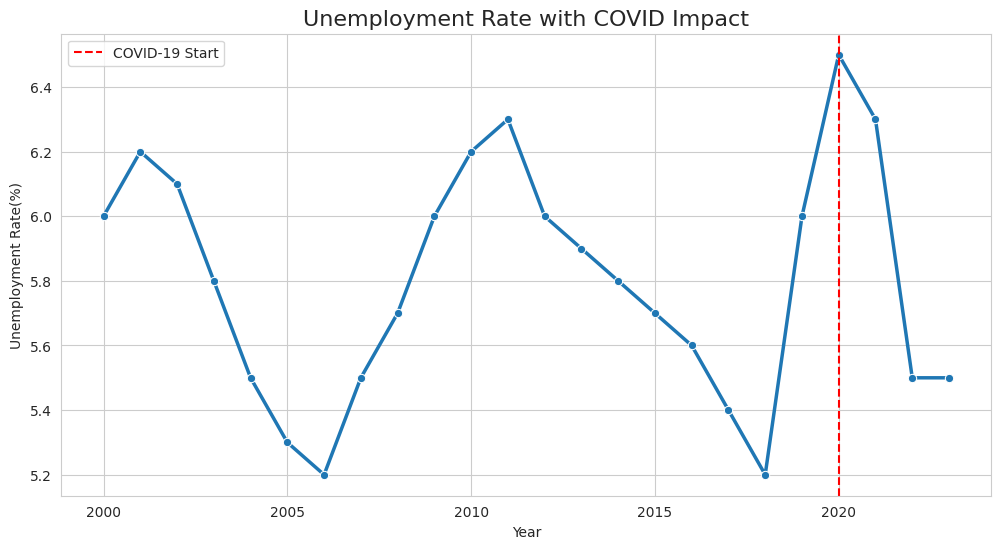

In [ ]:
# Plot unemployment rate trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='unemployment _ rate _ (%)',marker='o',linewidth=2.5)
plt.axvline(x=2020, color='red',linestyle='--',label='COVID-19 Start')
plt.title('Unemployment Rate with COVID Impact' , fontsize=16)
plt.xlabel('Year')
plt.ylabel('Unemployment Rate(%)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate average unemployment before 2020 (Pre-COVID)
pre_covid_avg = df[df['year'] < 2020] ['unemployment _ rate _ (%)'].mean()

# Calculate average unemployment from 2020 onwards (Post-COVID)
post_covid_avg = df[df['year'] >= 2020] ['unemployment _ rate _ (%)'].mean()

# Print both average with 2 decimal places
print(f"Average Unemployment Rate (Pre-COVID): {pre_covid_avg:.2f}%")
print(f"Average Unemployment Rate (Post-COVID): {post_covid_avg:.2f}%")

Average Unemployment Rate (Pre-COVID): 5.77%
Average Unemployment Rate (Post-COVID): 5.95%


In [ ]:
# Calculate the change in unemployment rate after COVID
change = post_covid_avg - pre_covid_avg
print(f"Unemployment increased by: {change:.2f}% after COVID")

Unemployment increased by: 0.18% after COVID


/tmp/ipython-input-10-168987900.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values,palette='pastel')


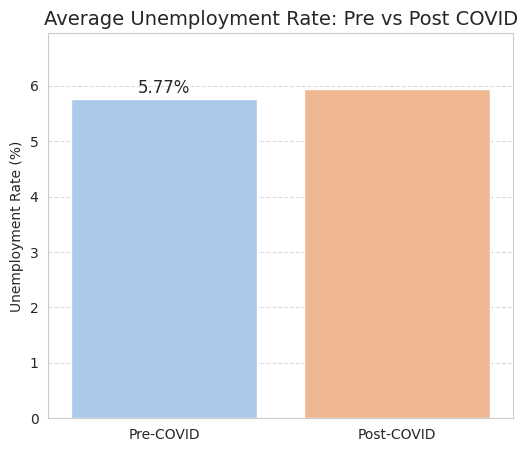

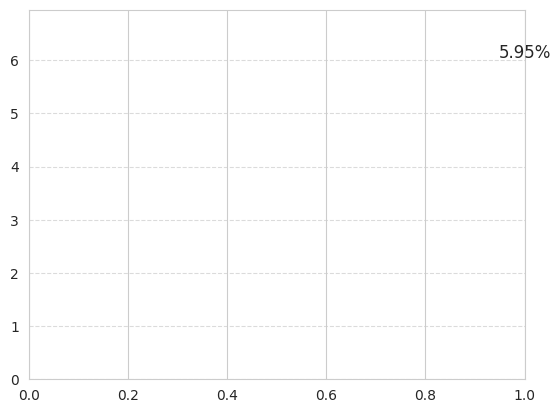

In [ ]:
# visual comparison of post and pre COVID umemployment rates
# creat data for the bar plot
labels = ['Pre-COVID','Post-COVID']
values = [pre_covid_avg,post_covid_avg]

# create the bar chart
plt.figure(figsize=(6,5))
sns.barplot(x=labels, y=values,palette='pastel')

# Add title and labels
plt.title('Average Unemployment Rate: Pre vs Post COVID', fontsize=14)
plt.ylabel('Unemployment Rate (%)')

# Add value labels on the top of bars
for i, value in enumerate(values):
  plt.text(i,value + 0.1, f"{value:.2f}%", ha='center' , fontsize=12)

  plt.ylim(0,max(values) + 1) #adjust y-axis to fit value labels
  plt.grid(axis='y', linestyle='--',alpha=0.7)
  plt.show()